# Proyek Analisis Data: Bike-sharing-dataset
- **Nama  : Nurul Itsnaini**
- **Email : nurul.itsnaini1711@gmail.com**
- **ID Dicoding : MC229D5X0883**

## Menentukan Pertanyaan Bisnis
- Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam dua tahun terakhir ini?
- Pertanyaan 2: Pada musim apa yang memiliki tingkat penyewaan sepeda paling tinggi dan paling rendah?
- Pertanyaan 3: Bagaimana perbandingan jumlah penyewaan sepeda pada hari libur dan hari kerja?
- Pertanyaan 4: Bagaimana perbandingan jumlah pengguna sepeda biasa dan pengguna terdaftar?
- Pertanyaan 5: Bagaimana tren jumlah penyewaan sepeda berdasarkan jam?

## Import semua packages/library yang digunakan

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling
### Gathering Data

- **Memuat Data day**

In [57]:
day_df = pd.read_csv ("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- **Memuat Data hour**

In [58]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada Bike-sharing-dataset, terdapat dua data berformat .csv yaitu:
1. day.csv
2. hour.csv

### Assessing Data

- **Menilai Data day_df**

In [59]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- **Mengecek jumlah duplikasi dan ringkasan parameter statistik yang terdapat dalam day_df**

In [60]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- **Mengecek missing value yang terdapat dalam day_df**

In [61]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- **Menilai Data hour_df**

In [62]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- **Mengecek jumlah duplikasi dan ringkasan parameter statistik yang terdapat dalam hour_df**

In [63]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- **Mengecek missing value yang terdapat dalam hour_df**

In [64]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
  
Menurut informasi diatas :
- Jumlah data pada day_df dan hour_df sudah lengkap, artinya kedua data tidak ada missing value didalamnya, dan masing-masing data tidak ada duplikasi serta tidak ada keanehan dalam ringkasan parameter statistik dari kedua data;
- Terdapat ketidaksesuaian/kesalahan tipe data dari dua data diatas, Seharusnya kolom dteday direpresentasikan sebagai tipe data **datetime**, bukan **object**;
- Kolom **season, yr, mnth, holiday, weekday, workingday dan weathershit** bisa direpresentasikan dalam tipe data category, karena bernilai kelompok/kategori dengan jumlah terbatas;
- Sebaiknya mengganti nama kolom dan mengkonversi nilai dalam kolom agar mudah dipahami.

### Cleaning Data

**Membersihkan Data day_df dan hour_df**

- **Mengganti tipe data object menjadi datetime pada day_df dan hour_df**

In [65]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])

- **Mengganti tipe data int menjadi category pada day_df dan hour_df**

In [66]:
category_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for column in category_columns:
    day_df[column] = day_df[column].astype ("category")
    hour_df[column] = hour_df[column].astype ("category")

- **Cek! apakah sudah terganti?**

In [67]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

- **Mengganti nama kolom pada day_df dan hour_df agar lebih mudah dibaca**

In [68]:
day_df.rename (columns = {"dteday":"date_day","yr": "year", "mnth": "month", "cnt":"count"}, inplace = True)

In [69]:
hour_df.rename (columns = {"dteday":"date_day","yr":"year","mnth":"month","hr":"hours","cnt":"count"}, inplace = True)

In [70]:
day_df.head()

,instant,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [71]:
hour_df.head()

,instant,date_day,season,year,month,hours,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- **Mengkonversi nilai pada kolom season dalam day_df dan hour_df**

In [72]:
day_df["season"] = day_df["season"].cat.rename_categories({1:"Spring", 2:"Summer", 3:"Fall", 4: "Winter"})

In [73]:
day_df.head()

,instant,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [74]:
hour_df["season"]= hour_df["season"].cat.rename_categories({1:"Spring", 2:"Summer", 3:"Fall", 4: "Winter"})

In [75]:
hour_df.head()

,instant,date_day,season,year,month,hours,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- **Mengkonversi nilai pada kolom year dalam day_df dan hour_df**

In [76]:
day_df["year"] = day_df["year"].cat.rename_categories({0:2011, 1:2012})

In [77]:
day_df.head()

,instant,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [78]:
hour_df["year"] = hour_df["year"].cat.rename_categories({0:2011, 1:2012})

In [79]:
hour_df.head()

,instant,date_day,season,year,month,hours,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- **Mengkonversi nilai pada kolom month dalam day_df dan hour_df**

In [80]:
day_df["month"] = day_df["month"].cat.rename_categories({1:"Jan", 2: "Feb", 3:"Mar", 4:"Apr", 5:"Mei", 6:"Jun", 7:"Jul", 8:"Ags", 9:"Sept", 10:"Okt", 11:"Nov", 12:"Des"})

In [81]:
day_df.head()

,instant,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [82]:
hour_df["month"] = hour_df["month"].cat.rename_categories({1:"Jan", 2: "Feb", 3:"Mar", 4:"Apr", 5:"Mei", 6:"Jun", 7:"Jul", 8:"Ags", 9:"Sept", 10:"Okt", 11:"Nov", 12:"Des"})

In [83]:
hour_df.head()

,instant,date_day,season,year,month,hours,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- **Mengkonversi nilai pada kolom weekday dalam day_df dan hour_df**

In [84]:
day_df["weekday"] = day_df["weekday"].cat.rename_categories({0:"Sunday", 1: "Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"})

In [85]:
day_df.head()

,instant,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [86]:
hour_df["weekday"] = hour_df["weekday"].cat.rename_categories({0:"Sunday", 1: "Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"})

In [87]:
hour_df.head()

,instant,date_day,season,year,month,hours,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


- **Mengkonversi nilai pada kolom workingday dalam day_df dan hour_df**

In [88]:
day_df["workingday"] = day_df["workingday"].cat.rename_categories({0: "Hari Libur", 1:"Hari Kerja"})

In [89]:
day_df.head()

,instant,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Hari Libur,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Hari Libur,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Hari Kerja,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,Hari Kerja,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,Hari Kerja,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [90]:
hour_df["workingday"] = hour_df["workingday"].cat.rename_categories({0: "Hari Libur", 1:"Hari Kerja"})

In [91]:
hour_df.head()

,instant,date_day,season,year,month,hours,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,Hari Libur,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,Hari Libur,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,Hari Libur,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,Hari Libur,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,Hari Libur,1,0.24,0.2879,0.75,0.0,0,1,1


- **Mengkonversi nilai pada kolom weathersit dalam day_df dan hour_df**

In [92]:
day_df["weathersit"] = day_df["weathersit"].cat.rename_categories({1: "Clear", 2:"Mist+Cloudy", 3:"Light Snow", 4:"Heavy Rain + Ice Pallets"})

In [93]:
day_df.head()

,instant,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Hari Libur,Mist+Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Hari Libur,Mist+Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Hari Kerja,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,Hari Kerja,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,Hari Kerja,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [94]:
hour_df["weathersit"] = hour_df["weathersit"].cat.rename_categories({1: "Clear", 2:"Mist+Cloudy", 3:"Light Snow", 4:"Heavy Rain + Ice Pallets"})

In [95]:
hour_df.head()

,instant,date_day,season,year,month,hours,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,Hari Libur,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,Hari Libur,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,Hari Libur,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,Hari Libur,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,Hari Libur,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

- Berdasarkan hasil proses assessing data, diketahui terdapat kesalahan tipe data untuk kolom dteday yang ada pada day_df maupun hour_df. Jadi, untuk mengatasi masalah ini, pada tahap cleaning data dilakukan penggantian tipe data pada **kolom "dteday" yang semula object diganti menjadi datetime**. Selain itu, pada tahap cleaning data dilakukan penggantian tipe data pada **kolom "season", "year", "month", "holiday", "weekday", "workingday", dan "weathersit" yang semula int diganti menjadi category**;
- Melakukan penggantian nama kolom agar mudah dibaca, yakni:
    1. dteday menjadi date_day
    2. yr menjadi year
    3. mnth menjadi month
    4. hr menjadi hours
    5. cnt menjadi count
- Melakukan konversi nilai pada kolom season, year, month, weekday, workingday, dan weathersit agar mudah dipahami, yakni:
    1. season : 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter
    2. year : 0 = 2011, 1 = 2012
    3. month : 1 = Jan, 2 = Feb, 3 = Mar, 4 = Apr, 5 = Mei, 6 = Jun, 7 = Jul, 8 = Ags, 9 = Sept, 10 = Okt, 11 = Nov, 12 = Des
    4. weekday : 0 = Sunday, 1 = Monday, 2 = Tuesday, 3 = Wednesday, 4 = Thursday, 5 = Friday, 6 = Saturday
    5. workingday : 0 = Hari libur, 1 = Hari kerja
    6. weathersit : 1 = Clear, 2 = Mist+Cloudy, 3 = Light Snow, 4 = Heavy Rain + Ice Pallets

## Exploratory Data Analysis (EDA)

### Explore Data day_df

- **Menampilkan ringkasan parameter statistik dari data day_df**

In [96]:
day_df.describe(include = "all")

,instant,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731.0,731,731.0,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2.0,12,2.0,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012.0,Jan,0.0,Sunday,Hari Kerja,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366.0,62,710.0,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- **Menampilkan data jumlah penyewaan sepeda berdasarkan musim dalam data day_df**

In [97]:
day_df.groupby(by = ["season"], observed = True)["count"].sum()

season
Spring     471348
Summer     918589
Fall      1061129
Winter     841613
Name: count, dtype: int64

- **Menampilkan data jumlah penyewaan sepeda per-tahun dalam data day_df**

In [98]:
day_df.groupby(by = ["year","month"], observed = True)["count"].sum()

year  month
2011  Jan       38189
      Feb       48215
      Mar       64045
      Apr       94870
      Mei      135821
      Jun      143512
      Jul      141341
      Ags      136691
      Sept     127418
      Okt      123511
      Nov      102167
      Des       87323
2012  Jan       96744
      Feb      103137
      Mar      164875
      Apr      174224
      Mei      195865
      Jun      202830
      Jul      203607
      Ags      214503
      Sept     218573
      Okt      198841
      Nov      152664
      Des      123713
Name: count, dtype: int64

- **Menampilkan data jumlah penyewaan sepeda berdasarkan hari libur dan hari kerja dalam data day_df**

In [99]:
day_df.groupby(by = ["workingday"], observed = True)["count"].sum()

workingday
Hari Libur    1000269
Hari Kerja    2292410
Name: count, dtype: int64

- **Menampilkan data jumlah penyewaan sepeda berdasarkan cuaca dalam data day_df**

In [100]:
day_df.groupby(by = ["weathersit"], observed = True)["count"].sum()

weathersit
Clear          2257952
Mist+Cloudy     996858
Light Snow       37869
Name: count, dtype: int64

- **Menampilkan data jumlah penyewaan sepeda berdasarkan hari dalam seminggu dalam data day_df**

In [101]:
day_df.groupby(by = ["weekday"], observed = True)["count"].sum()

weekday
Sunday       444027
Monday       455503
Tuesday      469109
Wednesday    473048
Thursday     485395
Friday       487790
Saturday     477807
Name: count, dtype: int64

- **Menampilkan data jumlah penyewaan sepeda berdasarkan pengguna biasa dan pengguna terdaftar per-tahun dalam data day_df**

In [102]:
day_df.groupby(by = ["year"], observed = True).agg({
    "registered":"sum",
    "casual" : "sum"
})

,registered,casual
year,,
2011,995851,247252
2012,1676811,372765


- **Menampilkan data jumlah penyewaan sepeda berdasarkan hari libur Nasional (tanggal merah) dan per-tahun dalam data day_df**

In [103]:
day_df[day_df["holiday"] == 1].groupby(by=["year"], observed=True).agg({
    "count": "sum",
})

,count
year,
2011,30022
2012,48413


### Explore Data hour_df

- **Menampilkan ringkasan parameter statistik dari data hour_df**

In [104]:
hour_df.describe(include ="all")

,instant,date_day,season,year,month,hours,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.0,17379,17379.000000,17379.0,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12,NaN,2.0,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012.0,Jul,NaN,0.0,Saturday,Hari Kerja,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488,NaN,16879.0,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- **Menampilkan data jumlah penyewaan sepeda berdasarkan jam dari data hour_df**

In [105]:
hour_df.groupby(by = ["hours"], observed = True)["count"].sum()

hours
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: count, dtype: int64

- **Menampilkan data jumlah penyewaan sepeda berdasarkan jam dan per-tahun dari data hour_df**

In [106]:
hour_df.groupby(by=["year", "hours"], observed=True).agg({
    "count": "sum"
})

count
year hours        
2011 0       15540
     1        9558
     2        6661
     3        3441
     4        1817
     5        5157
     6       20801
     7       56930
     8       95467
     9       59486
     10      47511
     11      56598
     12      69198
     13      69339
     14      66482
     15      68590
     16      85622
     17     127632
     18     116985
     19      85802
     20      62818
     21      48875
     22      37677
     23      25116
2012 0       23590
     1       14606
     2        9691
     3        4733
     4        2611
     5        9104
     6       34331
     7       97241
     8      165534
     9       99952
     10      78746
     11      94722
     12     115216
     13     115580
     14     109170
     15     114559
     16     142126
     17     209228
     18     192787
     19     140987
     20     101732
     21      76570
     22      57935
     23      38825

**Insight:**
- Berdasarkan ringkasan parameter statistik dari data day_df, diperoleh informasi bahwa total jumlah penyewa sepeda dari tanggal 01-01-2011 sampai 31-12-2012 adalah sebanyak 731 penyewa. Selain itu juga diperoleh informasi:
    1. Berdasarkan musim, jumlah penyewaan sepeda pada musim fall (musim gugur) ada sebanyak 1061129 penyewa, musim summer (musim panas) ada sebanyak 918589 penyewa, musim spring (musim semi) ada sebanyak 471348 penyewa dan musim winter (musim dingin) ada sebanyak 841613 penyewa.
    2. Berdasarkan tahun, jumlah penyewaan sepeda tertinggi ada di tahun 2012 yakni sebanyak 2049576 dan tahun 2011 yakni 1243103 penyewa.
    3. Diperoleh informasi bahwa jumlah penyewa sepeda di hari kerja lebih banyak dibandingkan dengan hari libur, yakni pada saat hari kerja ada sebanyak  2292410 penyewa, sedangkan ketika hari libur hanya ada 1000269 penyewa.
    4. Berdasarkan cuaca, diperoleh informasi bahwa ketika clear (cuaca cerah) ada sebanyak 2257952 penyewa, mist+cloudy (kabut,berawan) ada sebanyak 996858 penyewa, dan light snow (salju) ada sebanyak 37869 penyewa.
    5. Berdasarkan hari dalam satu minggu jumlah penyewaan sepeda pada Sunday 444027 penyewa, Monday: 455503 penyewa, Tuesday: 469109 penyewa, Wednesday: 473048 penyewa, Thursday: 485395 penyewa, Friday: 487790 penyewa, dan Saturday: 477807 penyewa.
    6. Jumlah pengguna sepeda biasa (bukan member) pada tahun 2011 ada sebanyak 247252 orang dan pada tahun 2012 ada sebanyak 372765 orang, sedangkan untuk pengguna terdaftar (member) pada tahun 2011 ada sebanyak 995851 orang dan pada tahun 2012 ada sebanyak 1676811 orang. Berdasarkan informasi tersebut, seseorang yang sudah menjadi member dengan belum/bukan menjadi member memiliki nilai yang cukup jauh.
    7. Jumlah penyewa sepeda pada hari libur Nasional (tanggal merah) pada tahun 2011 ada sebanyak 30022 penyewa, dan pada tahun 2012 ada sebanyak 48413 penyewa.
- Berdasarkan ringkasan parameter statistik dari data hour_df, diperoleh informasi bahwa total jumlah penyewa sepeda ada sebanyak 17379 penyewa dengan range jam penyewaan yakni jam 00.00 sampai 23.00 dan rata-rata penyewaan sepeda terjadi pada jam 11.54 serta standar deviasi 6.91. Selain itu, diperoleh informasi bahwa penyewaan tertinggi terjadi pada jam 17.00 yakni sebesar 336860 penyewa dan penyewaan terendah terjadi pada jam 04.00 yakni sebesar 4428 penyewa.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir ini?

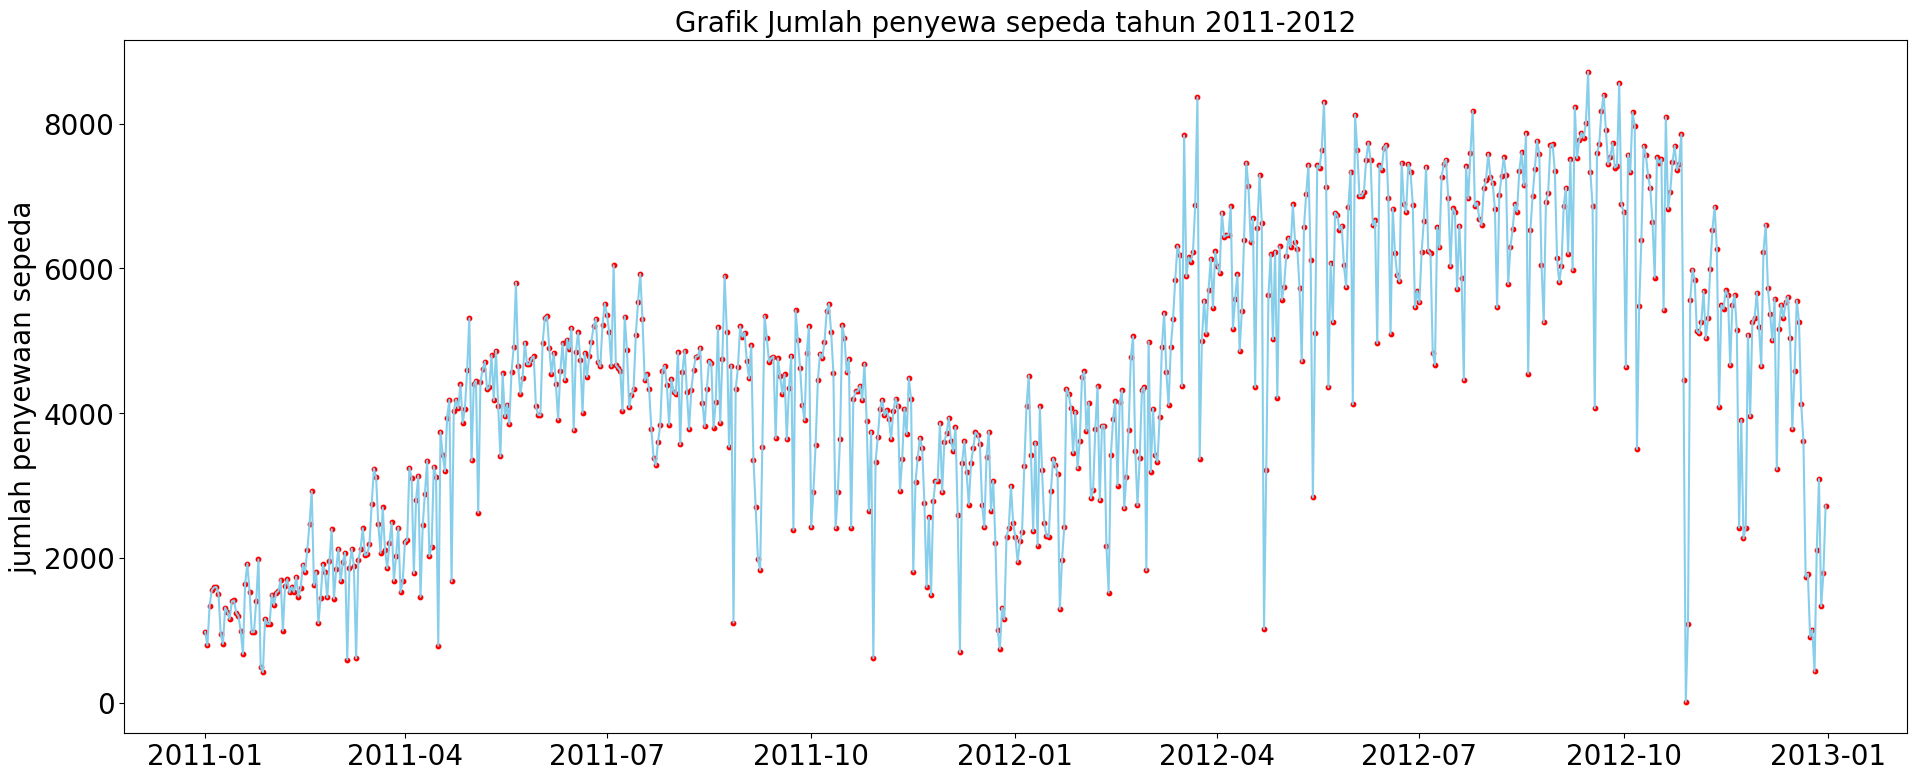

In [107]:
# Membuat figure dengan ukuran (23,9)
plt.figure(figsize=(23,9))

# Mengelompokkan data berdasarkan kolom date_day dan mengambil nilai maksimum
monthly_count = day_df["count"].groupby(day_df["date_day"]).max()

# Membuat scatter plot
plt.scatter(monthly_count.index, monthly_count.values, color="red", s=10, marker='o')

# Membuat line plot untuk menghubungkan titik-titik dalam scatter plot
plt.plot(monthly_count.index, monthly_count.values, color = "skyblue")

# Pemberian nama/label
plt.xlabel=None
plt.ylabel("jumlah penyewaan sepeda", fontsize = 20)
plt.title("Grafik Jumlah penyewa sepeda tahun 2011-2012", fontsize=20)
plt.tick_params(axis ='x', labelsize = 20)
plt.tick_params(axis ='y', labelsize = 20)

# Menampilkan grafik
plt.show()

### Pertanyaan 2:  Pada musim apa yang memiliki tingkat penyewaan sepeda paling tinggi dan paling rendah?

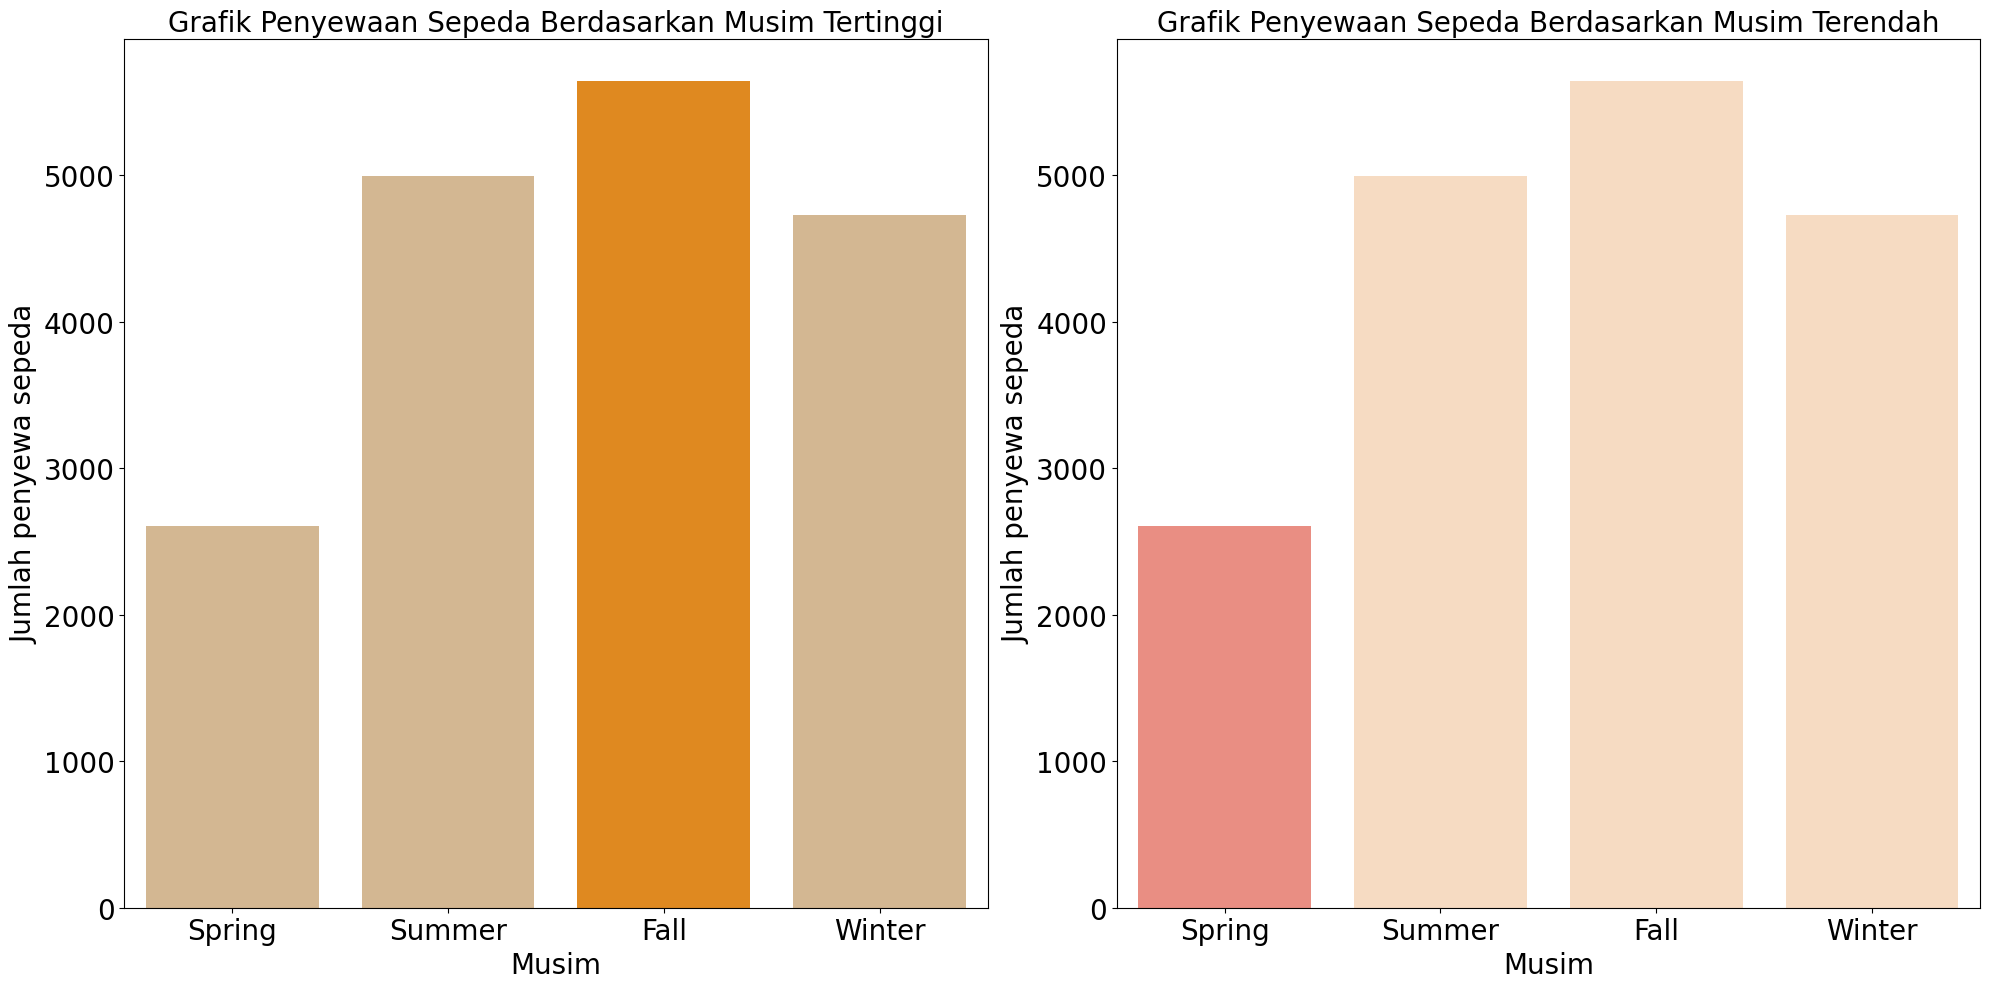

In [120]:
# Mengatur warna untuk masing-masing bar chart
colors1 = ["burlywood", "burlywood", "darkorange","burlywood"]
colors2 = ["salmon","peachpuff", "peachpuff", "peachpuff"]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10)) 

# Bar chart pertama
sns.barplot(
    y ="count", 
    x ="season",
    hue ="season",
    data = day_df.sort_values(by="season", ascending=True),
    palette = colors1,
    errorbar = None,
    ax = axes[0] 
)
axes[0].set_title("Grafik Penyewaan Sepeda Berdasarkan Musim Tertinggi", fontsize=20)
axes[0].set_ylabel("Jumlah penyewa sepeda", fontsize = 20)
axes[0].set_xlabel("Musim", fontsize = 20)
axes[0].tick_params(axis ='x', labelsize = 20)
axes[0].tick_params(axis ='y', labelsize = 20)

# Bar chart kedua
sns.barplot(
    y ="count", 
    x ="season",
    hue ="season",
    data = day_df.sort_values(by="season", ascending=False),
    palette = colors2,
    errorbar = None,
    ax = axes[1]  
)
axes[1].set_title("Grafik Penyewaan Sepeda Berdasarkan Musim Terendah", fontsize=20)
axes[1].set_ylabel("Jumlah penyewa sepeda", fontsize = 20)
axes[1].set_xlabel("Musim", fontsize = 20)
axes[1].tick_params(axis ='x', labelsize= 20)
axes[1].tick_params(axis ='y', labelsize= 20)

# Menampilkan plot
plt.tight_layout()
plt.show()


### Pertanyaan 3: Bagaimana perbandingan jumlah penyewaan sepeda pada hari libur dan hari kerja?

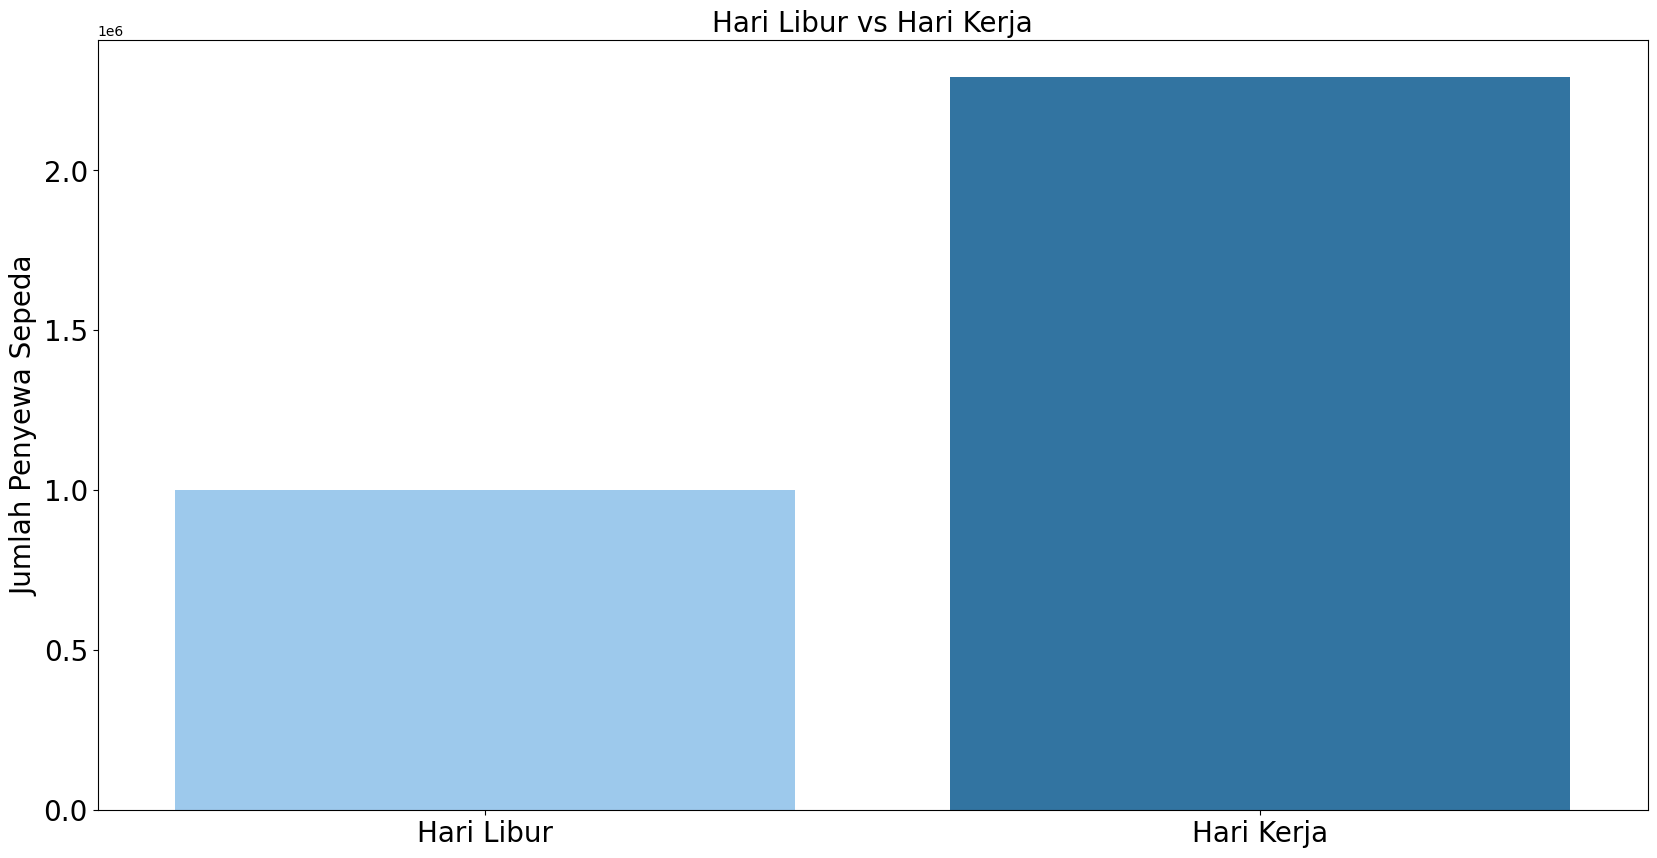

In [117]:
# mengatur warna
colors = ["#90CAF9","#1f77b4"]

#Agregasi jumlah penyewa sepeda berdasarkan workingday
total_workingday = day_df.groupby(by = ["workingday"], observed = True, as_index=False)["count"].sum()

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk y="count" dan x="workingday", menggunakan data=day_df
sns.barplot(
        y ="count", 
        x ="workingday",
        hue ="workingday",
        data = total_workingday,
        palette = colors,
        errorbar = None,
        ax = ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Hari Libur vs Hari Kerja", loc ="center", fontsize=20)
ax.set_ylabel("Jumlah Penyewa Sepeda", fontsize = 20)
ax.set_xlabel(None)
ax.tick_params(axis ='x', labelsize = 20)
ax.tick_params(axis ='y', labelsize = 20)

# menampilkan plot
plt.show()

### Pertanyaan 4: Bagaimana perbandingan jumlah pengguna sepeda biasa dan pengguna terdaftar?

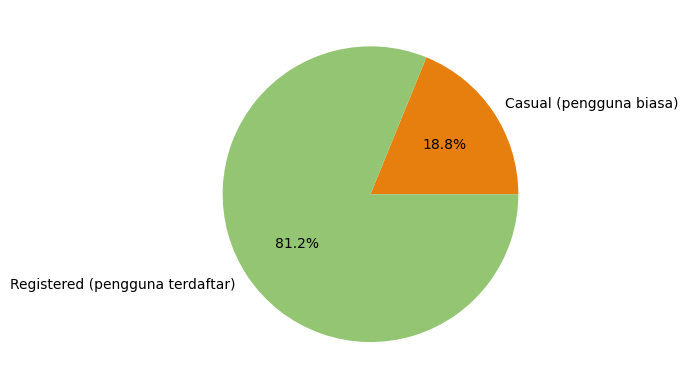

In [110]:
# Menjumlahkan semua elemen dalam kolom casual (pengguna biasa)
jumlah_total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered (pengguna terdaftar)
jumlah_total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [jumlah_total_casual, jumlah_total_registered]
labels = ["Casual (pengguna biasa)", "Registered (pengguna terdaftar)"]
colors=["#E67F0D", "#93C572"]

# Membuat pie plot
plt.pie(data, 
        labels=labels, 
        autopct='%1.1f%%', 
        colors=colors)

# Menampilkan pie plot
plt.show()

### Pertanyaan 5: Bagaimana tren jumlah penyewaan sepeda berdasarkan jam?

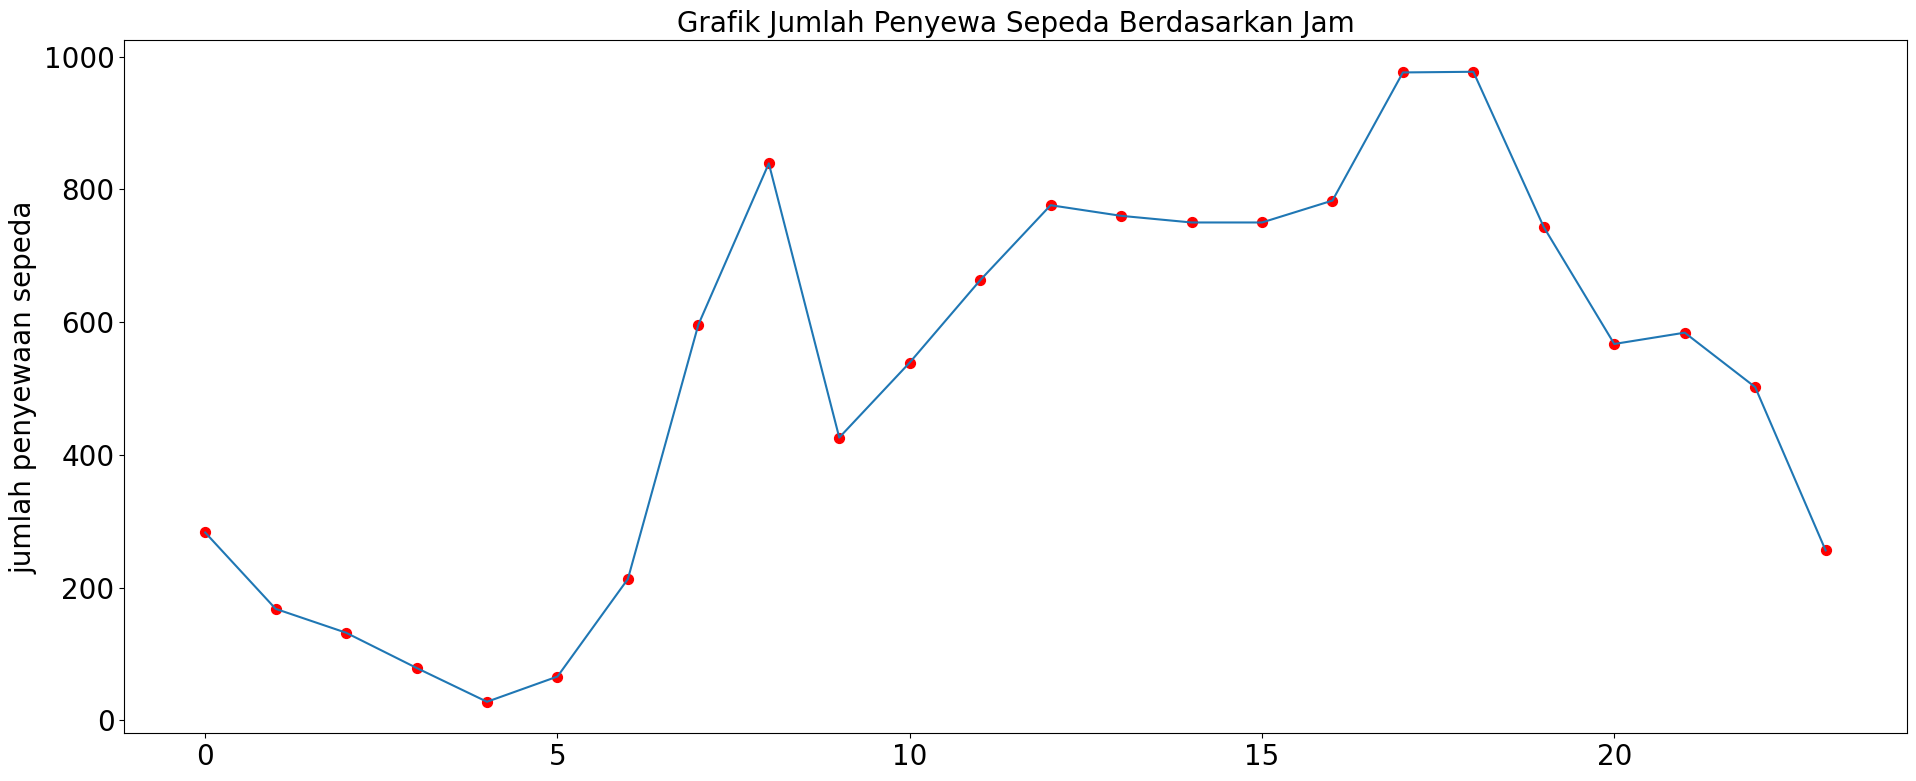

In [111]:
# Membuat figure dengan ukuran (23,9)
plt.figure(figsize=(23,9))

# Mengelompokkan data berdasarkan kolom hours dan mengambil nilai maksimum
hourly_count = hour_df["count"].groupby(hour_df["hours"]).max()

# Membuat scatter plot
plt.scatter(hourly_count.index, hourly_count.values, color="red", s=50, marker='o')

# Membuat line plot untuk menghubungkan titik-titik dalam scatter plot
plt.plot(hourly_count.index, hourly_count.values, color="#1f77b4")

# Pemberian nama/label
plt.xlabel= None
plt.ylabel("jumlah penyewaan sepeda", fontsize=20)
plt.title("Grafik Jumlah Penyewa Sepeda Berdasarkan Jam", fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

**Insight**:
1. Pada pertanyaan 1, diperoleh informasi bahwa secara keseluruhan, jumlah penyewaan sepeda mengalami peningkatan dari awal tahun 2011 hingga akhir tahun 2012. Akan tetapi, setelah mencapai puncak di pertengahan tahun 2012 jumlah penyewaan mengalami sedikit penurunan ketika mendekati akhir tahun. Hal ini mungkin disebabkan oleh perubahan musim atau cuaca dan event-event khusus, misalnya hari libur.
2. Pada pertanyaan 2, diperoleh informasi bahwa berdasarkan musim, jumlah penyewa sepeda tertinggi ada pada musim Fall (Musim gugur), dan musim Spring (musim semi) memiliki penyewaan yang lebih rendah dibandingkan dengan musim lainnya.
3. Pada pertanyaan 3, diperoleh informasi bahwa jumlah penyewa sepeda pada hari kerja lebih banyak daripada jumlah penyewa sepeda pada hari libur.
4. Pada pertanyaan 4, diperoleh informasi bahwa sebagian besar penyewa adalah pengguna terdaftar dibandingkan dengan pengguna biasa.
5. Pada pertanyaan 5, diperoleh informasi bahwa jumlah penyewaan meningkat tajam mulai pagi hari, dan mencapai puncaknya ketika jam pulang kerja atau sore hari. Namun, ada juga pola menurun di malam hari.

## Analisis Lanjutan

### Analisis Clustering

- **Mengelompokkan jumlah penyewa sepeda berdasarkan kategori rentang waktu**

In [112]:
# Definisikan bins dan label untuk kategori waktu
bins = [0, 6, 12, 18, 24]
labels = ["Dini Hari (00.00-05.59)", "Pagi (06.00-11.59)", "Siang-Sore (12.00-17.59)", "Malam (18.00-23.59)"]

# Terapkan binning pada kolom 'hours'
hour_df["kategori_waktu"] = pd.cut(hour_df["hours"], bins=bins, labels=labels, right=False)

# Mengelompokkan data berdasarkan kategori waktu dan menjumlahkan total penyewaan
waktu_grouped = hour_df.groupby("kategori_waktu", observed=True)["count"].sum().reset_index()

# Menampilkan hasilnya
print(waktu_grouped)


             kategori_waktu    count
0   Dini Hari (00.00-05.59)   106509
1        Pagi (06.00-11.59)   907319
2  Siang-Sore (12.00-17.59)  1292742
3       Malam (18.00-23.59)   986109


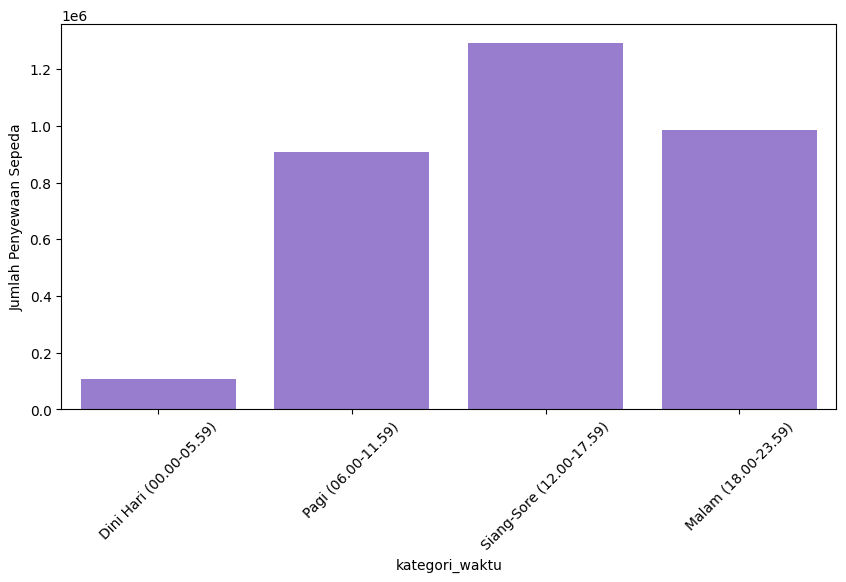

In [118]:
# Definisi bins dan label untuk kategori waktu
bins = [0, 6, 12, 18, 24]
labels = ["Dini Hari (00.00-05.59)", "Pagi (06.00-11.59)", "Siang-Sore (12.00-17.59)", "Malam (18.00-23.59)"]

# Terapkan binning pada kolom 'hours'
hour_df["kategori_waktu"] = pd.cut(hour_df["hours"], bins=bins, labels=labels, include_lowest=True, right=False)

# Mengelompokkan data berdasarkan kategori waktu dan menjumlahkan total penyewaan
waktu_grouped = hour_df.groupby("kategori_waktu", observed=True)["count"].sum().astype(int).reset_index()

# Membuat plot
plt.figure(figsize=(10,5))
ax = sns.barplot(x="kategori_waktu", y="count", data=waktu_grouped, color="mediumpurple")

# Mengatur label sumbu
plt.xlabel= ("Kategori Waktu")
plt.ylabel("Jumlah Penyewaan Sepeda")

# Menampilkan grafik
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Dilakukan analisis clustering berdasarkan kategori rentang waktu, yakni:
    1. Dini Hari (pukul 00.00-05.59) ada sebanyak 106509 penyewa;
    2. Pagi (pukul 06.00-11.59) ada sebanyak 907319 penyewa;
    3. Siang-Sore (pukul 12.00-17.59) ada sebanyak 1292742 penyewa;
    4. Malam (pukul 18.00-23.59) ada sebanyak 986109 penyewa.
- Berdasarkan informasi diatas, diperoleh rentang waktu terbanyak jumlah penyewa sepeda yaitu pada siang-sore hari sekitar pukul 12.00-17.59, dan waktu terendah jumlah penyewa sepeda yaitu pada dini hari sekitar pukul 00.00-05.59.

## Conclusion

**Pertanyaan:**
- Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam dua tahun terakhir ini?
- Pertanyaan 2: Pada musim apa yang memiliki tingkat penyewaan sepeda paling tinggi dan paling rendah?
- Pertanyaan 3: Bagaimana perbandingan jumlah penyewaan sepeda pada hari libur dan hari kerja?
- Pertanyaan 4: Bagaimana perbandingan jumlah pengguna sepeda biasa dan pengguna terdaftar?
- Pertanyaan 5: Bagaimana tren jumlah penyewaan sepeda berdasarkan jam?

**Conclusion pertanyaan 1:**
- Berdasarkan hasil analisis, pada tahun 2011 jumlah penyewaan sepeda tertinggi ada pada bulan Juni, yaitu sebanyak 143512 penyewa dan terus mengalami penurunan hingga bulan Desember hanya menjadi 87323 penyewa. Selanjutnya pada tahun 2012, jumlah penyewaan terus meningkat dari bulan Januari-Agustus dan mencapai puncaknya pada bulan September, yaitu sebanyak 218573. Akan tetapi, setelah bulan September mengalami penurunan dan secara signifikan ada pada bulan Desember hanya menjadi 123713 penyewa. Diperoleh informasi secara keseluruhan jumlah penyewaan sepeda mengalami peningkatan dari awal tahun 2011 hingga akhir tahun 2012. Akan tetapi, setelah mencapai puncak di pertengahan tahun 2012 jumlah penyewaan mengalami sedikit penurunan ketika mendekati akhir tahun. Hal ini mungkin disebabkan oleh perubahan musim atau cuaca dan event-event khusus, misalnya hari libur.

**Conclusion pertanyaan 2:**
- Berdasarkan hasil analisis, musim yang memiliki tingkat penyewaan sepeda tertinggi ada pada musim Fall(musim gugur) yaitu sebanyak 1061129 penyewa. Selanjutnya untuk musim yang memiliki tingkat penyewaan terendah ada pada musim Spring(musim semi) yaitu sebanyak 471348 penyewa.

**Conclution pertanyaan 3:**
- Diperoleh informasi dari hasil analisis yaitu jumlah penyewaan sepeda pada hari kerja lebih tinggi dari pada jumlah penyewaan sepeda pada hari libur. Pada hari kerja ada sebanyak 22924101 penyewa, sedangkan pada hari libur ada sebanyak 1000269.

**Conclution pertanyaan 4:**
- Berdasarkan informasi yang diperoleh, sebagian besar pengguna telah berstatus sebagai pengguna terdaftar (registered) yakni sebesar 81,2 % dan sebagian kecil masih menjadi pengguna biasa (casual) yakni sebesar 18,8%.

**Conclution pertanyaan 5:**
- Berdasarkan hasil analisis, jumlah penyewaan sepeda tertinggi ada pada sore hari sekitar jam 17.00, dan jumlah penyewaan sepeda terendah ada pada dini hari sekitar jam 04.00.